In [87]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Clean dataset
df = pd.read_csv('data/S&F_Manipulative_Gaze_20250507_all_no_header..txt', delimiter = '\t', header = None, index_col = 0).reset_index()
df.columns = ['toy', 'del', 'onset', 'offset', 'duration', 'del', 'filename', 'del']
df.drop(columns = ['del'], inplace = True)
df['filename'] = df['filename'].apply(lambda x: re.sub(r'_[^_]*$', "", x)) 
df.drop_duplicates(inplace = True)
df.to_csv('data/S&F_Manipulative_Gaze_20250507_all_no_header.csv')

In [78]:
# Sample of cleaned dataset
df

,toy,onset,offset,duration,filename
0,Bubbles,15.962,17.047,1.085,d730eddb_776.256488-1034.843263
1,Bubbles,26.392,26.722,0.330,d730eddb_776.256488-1034.843263
2,Bubbles,27.542,29.281,1.739,d730eddb_776.256488-1034.843263
3,Bubbles,37.861,38.191,0.330,d730eddb_776.256488-1034.843263
4,Bubbles,71.668,72.191,0.523,d730eddb_776.256488-1034.843263
...,...,...,...,...,...
3558,Mini-spinny,105.503,106.177,0.674,61ead543_27.464295-367.956383
3559,Mini-spinny,254.168,261.241,7.073,61ead543_27.464295-367.956383
3560,Mini-spinny,270.118,272.287,2.169,61ead543_27.464295-367.956383
3561,Mini-spinny,318.393,330.612,12.219,61ead543_27.464295-367.956383


toy
Mini-spinny    1043
Bee             875
Bubbles         748
Face            453
Worm            416
Clutter          28
Name: count, dtype: int64

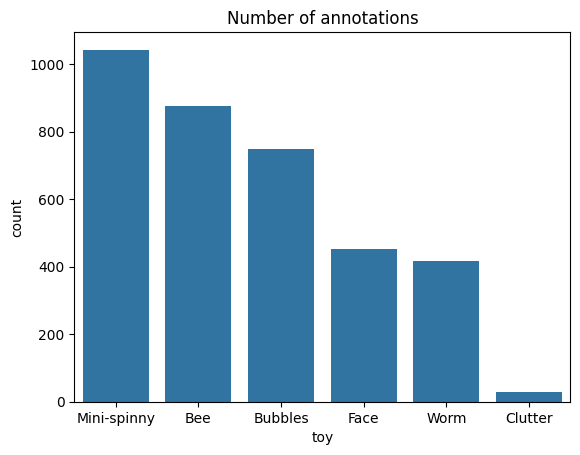

In [91]:
# Number of annotations
counts = df['toy'].value_counts()
display(counts)
sns.barplot(counts)
plt.title('Number of annotations')
plt.show()

In [85]:
# Mean duration of a single annotation
mean_duration = df.groupby('toy')['duration'].mean()
display(mean_duration)

toy
Bee            2.099233
Bubbles        2.006413
Clutter        1.493857
Face           1.462433
Mini-spinny    2.674136
Worm           1.349041
Name: duration, dtype: float64

In [86]:
# Median duration of a single annotation
median_duration = df.groupby('toy')['duration'].median()
display(median_duration)

toy
Bee            1.1120
Bubbles        0.9940
Clutter        1.1495
Face           0.9600
Mini-spinny    1.2540
Worm           0.7115
Name: duration, dtype: float64

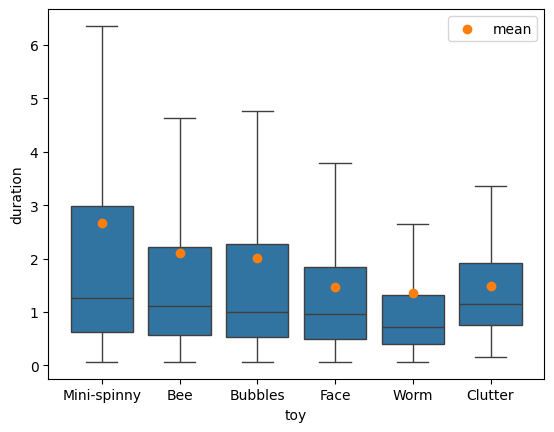

In [109]:
sns.boxplot(df, x = 'toy', y = 'duration', showfliers = False, order = counts.index)
plt.scatter(mean_duration.index, mean_duration, zorder = 10, label = 'mean')
plt.legend()

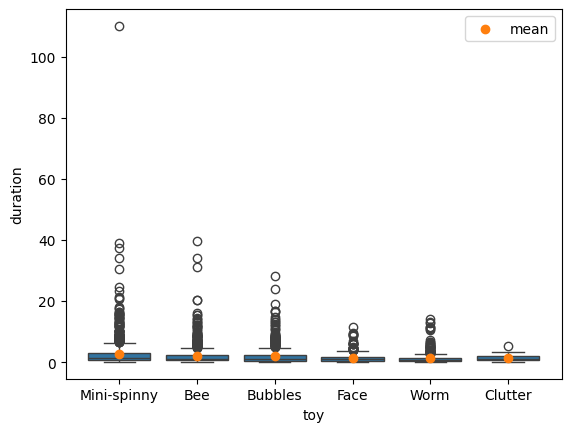

In [108]:
sns.boxplot(df, x = 'toy', y = 'duration', showfliers = True, order = counts.index)
plt.scatter(mean_duration.index, mean_duration, zorder = 10, label = 'mean')
plt.legend()

In [98]:
# Total duration of all annotations
total_duration = df.groupby('toy')['duration'].sum()

<Axes: xlabel='toy', ylabel='duration'>

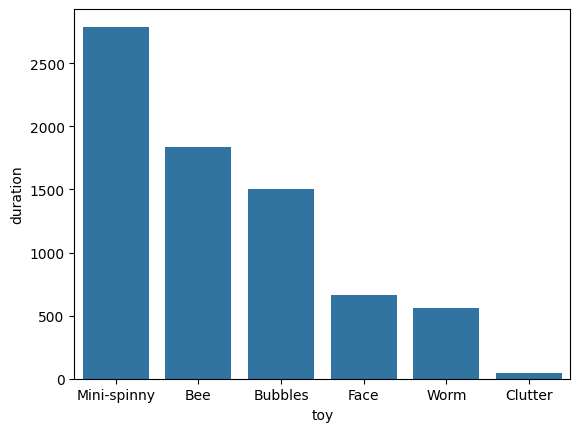

In [104]:
sns.barplot(total_duration, order = counts.index)